In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/Cleaned Data/df_cleaned.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,id,date,yr_renovated,zipcode,lat,long,view,waterfront,month,decade_built
0,0,993000.0,4,2.00,2850,14810,2.0,5,8,2490,...,824059083,2014-09-02,0,98004,47.5892,-122.203,0,0,9,1950
1,1,991700.0,4,3.00,2290,2350,2.0,3,9,1610,...,375000165,2014-07-23,2011,98116,47.5740,-122.415,1,0,7,1920
2,2,990400.0,3,2.50,2100,4097,2.0,3,9,2100,...,524059323,2015-02-19,0,98004,47.5983,-122.200,0,0,2,2000
3,3,990000.0,3,2.75,2500,6350,2.0,5,9,2370,...,9829200580,2014-09-17,0,98122,47.6035,-122.285,0,0,9,1970
4,4,990000.0,4,3.75,3450,4940,2.0,3,10,2570,...,3047700105,2015-04-23,0,98103,47.6920,-122.338,0,0,4,2000


Text(0, 0.5, 'Number of House Sales')

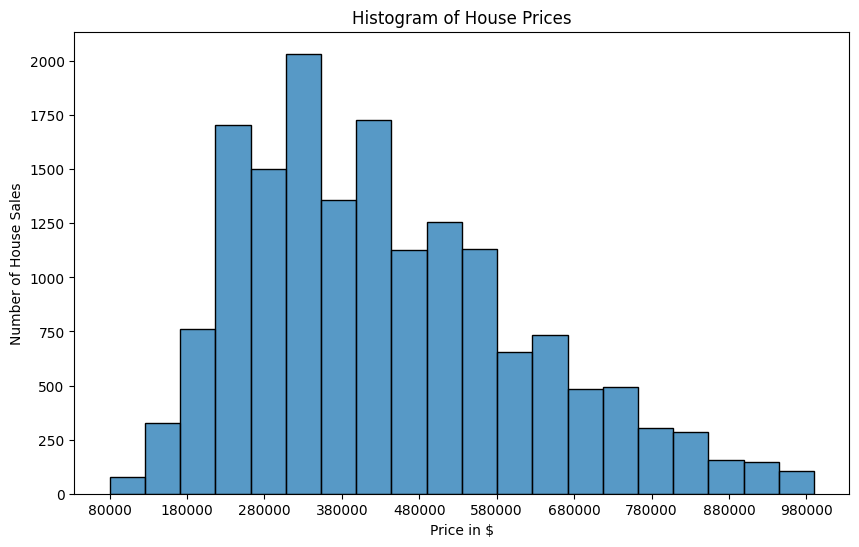

In [5]:
df['price_rounded'] = df['price']//10000*10000

plt.figure(figsize=(10,6))
plt.xticks(np.arange(df['price_rounded'].min(), df['price_rounded'].max()+10000, 100000))
sns.histplot(df['price_rounded'], bins=20, kde=False)
plt.title('Histogram of House Prices')
plt.xlabel('Price in $')
plt.ylabel('Number of House Sales')

Text(0, 0.5, 'Number of House Sales')

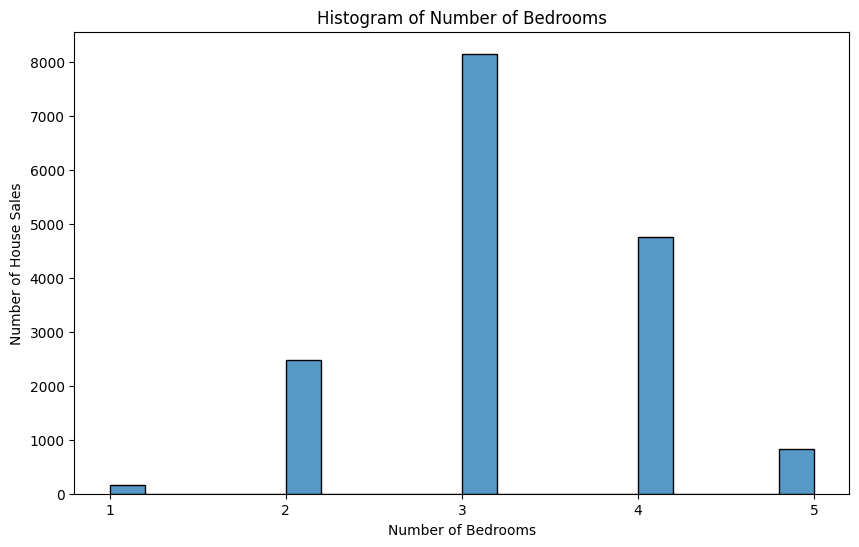

In [6]:
plt.figure(figsize=(10,6))

sns.histplot(df['bedrooms']//1, bins=20, kde=False)
plt.xticks(np.arange(df['bedrooms'].min(), df['bedrooms'].max()+1, 1))
plt.title('Histogram of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of House Sales')


/tmp/ipykernel_2442/1913720541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renovated['decade_renovated'] = df_renovated['yr_renovated']//10*10


<Axes: xlabel='decade_renovated'>

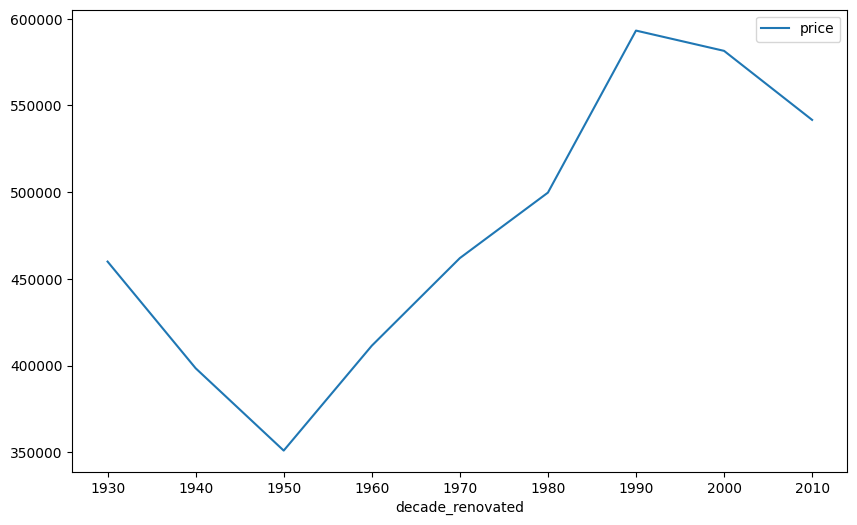

In [7]:
df_renovated = df[df['yr_renovated'] != 0]
df_renovated['decade_renovated'] = df_renovated['yr_renovated']//10*10
df_reno_price = df_renovated.groupby('decade_renovated')['price'].mean().reset_index() 
df_reno_price.plot(x='decade_renovated', y='price', figsize=(10, 6))

<Axes: xlabel='decade_built'>

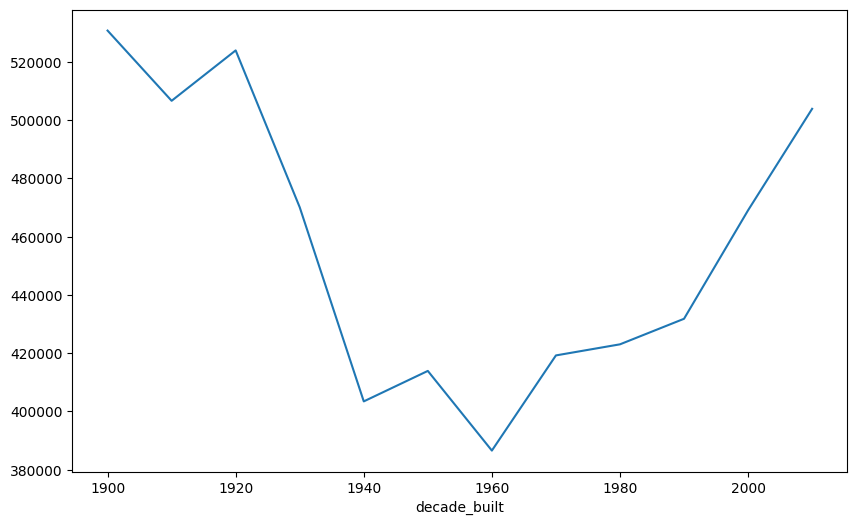

In [9]:


df_price_to_decade_built = df.groupby('decade_built')['price'].mean()
df_price_to_decade_built.plot(x = 'decade_built', y = 'price', figsize=(10, 6))

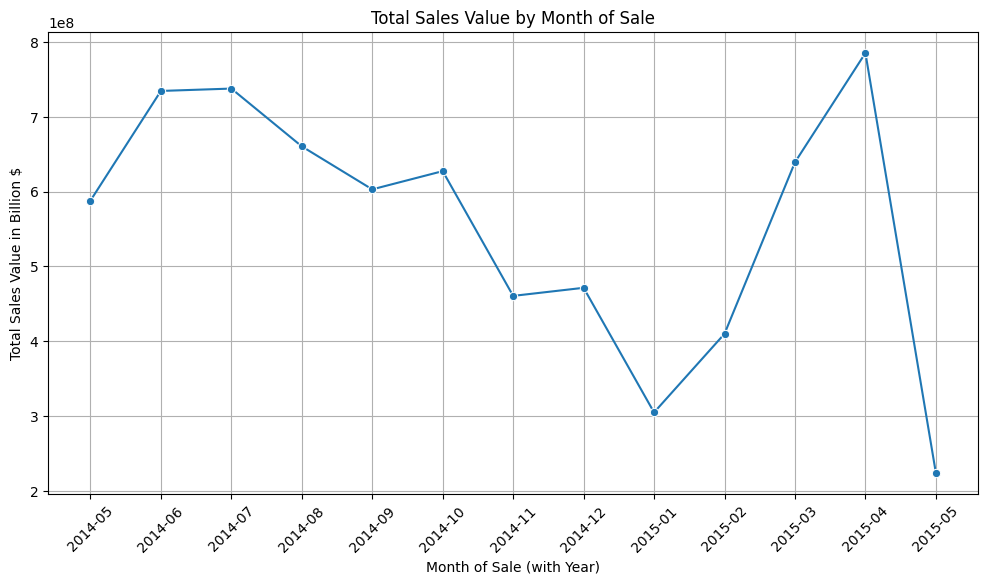

In [15]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)
df_sales_by_month_ordered = df.groupby('year_month')['price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='price', data=df_sales_by_month_ordered, marker='o')

plt.title('Total Sales Value by Month of Sale')
plt.xlabel('Month of Sale (with Year)')
plt.ylabel('Total Sales Value in Billion $')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

